In [ ]:
import numpy as np 
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.utils.data as utils 
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt 
import torchvision.utils 
import torchvision 
from PIL import Image 
import os


In [ ]:

def imshow(img, text=None, should_save=False):
    '''This function is used to display images in the form of a grid with text above the grid.'''
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(
            75,
            8,
            text,
            style="italic",
            fontweight="bold",
            bbox={"facecolor": "white", "alpha": 0.8, "pad": 10},
        )
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()

In [ ]:
class ContrastiveLoss(nn.Module):
    "Contrastive loss function: it aims to learn representations that are similar for the same class and dissimilar for different classes. Usually useful for self-supervised learning."

    # It calculates the euclidean distance between the two embeddings and then applies a different loss panelty based on the label. If the label is 0, then the loss is calculated as the euclidean distance between the two embeddings. If the label is 1, then the loss is calculated as the maximum between 0 and the difference between the margin and the euclidean distance between the two embeddings. 
    # The margin is a hyperparameter that is used to define the minimum distance between the two embeddings. If the euclidean distance is greater than the margin, then the loss is 0. If the euclidean distance is less than the margin, then the loss is the difference between the margin and the euclidean distance

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__() # inherit from nn.Module
        self.margin = margin # margin is a hyperparameter

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2) # calculate the distance between the two outputs
        loss_contrastive = torch.mean(
            (1 - label) * torch.pow(euclidean_distance, 2)
            + (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)
        ) # calculate the loss using the contrastive loss function formula 
        # (1-label) * (euclidean_distance)^2 + (label) * (max(margin - euclidean_distance, 0))^2

        return loss_contrastive

In [ ]:
# Triplet loss will allow our model to map two similar images close and far from dissimilar sample image pairs.
# Uses: anchor, positive, negative
# Anchor: an image from the dataset
# Positive: an image that is similar to the anchor
# Negative: an image that is dissimilar to the anchor
# Margin increases the separation between our similar and dissimilar vector, and also eliminate the output of any trivial solution.
# This similarity or dissimilarity is measured by the distance between two vectors using L2 distance and cosine distance
# loss(a,p,n) = max(d(a,p) - d(a,n) + margin, 0)

In [ ]:
batch_size = 32 
epochs = 10

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
training_dir = "/content/gdrive/My Drive/data/sign_data/sign_data/train"
training_csv = "/content/gdrive/My Drive/data/sign_data/sign_data/train_data.csv"
testing_csv = "/content/gdrive/My Drive/data/sign_data/sign_data/test_data.csv"
testing_dir = "/content/gdrive/My Drive/data/sign_data/sign_data/test"

In [ ]:
# Pros and cons of using a Siamese network:
# Pros:
# 1. Robustness to class imbalance 
# 2. Ensemble with one of the classifier algorithms: GBM, RF classifier, SVM, etc.
# 3. Semantic Similarity

# Cons:
# 1. Training time is high
# 2. Doesn't output probabilities

In [ ]:
# Siamese Network

# Siamese Network is similarity problem which is used to find the similarity between two comparable things.
# Scalable and not much training data is required.
# One Shot Classification
# The similarity score lies between 0 and 1 using a sigmoid function.

# Implementation Procedure:
# 1. Training and Validation 
# 2. Testing
# 3. Deployment

In [ ]:
# Training the Network:
# The training process of a Siamese network is as follows:

# Initialize the siamese network, loss function, and Optimizer(like Adam , Adagrad, SGD etc)
# Pass the images one by one out of the image pairs through the siamese network, as here training involves pairwise learning.
# Calculate the loss using the outputs from the first and second images using the loss.
# Back propagate through the model to calculate the gradients of our model.
# Update the weights using an optimizer to minimize the loss after a certain number of epochs
# After we reach the max epochs we have set for the model and also get the least loss possible
# Save the model


# Testing the model:
# Load the test data
# Pass the image pairs and the labels
# Find the euclidean distance between the images
# Display the similar image pairs and dissimilar image pairs

In [ ]:
# Optimizers:
# 1. SGD: Stochastic Gradient Descent- iteratively updates the model parameters by taking small steps in the direction that decreases the loss. 
# Advantages: Simplicity, efficiency, robustness
# Disadvantages: slow convergence, sensitive to hyperparameters

# 2. Adagrad: Adaptive Gradient Algorithm- adapts the learning rate for each parameter based on its historical gradients.
# Advantages: Adaptive learning rate, effective for sparse data
# Disadvantages: sensitive to early gradients, can over penalize sparse features

# 3. RMSprop: Root Mean Square Propagation- uses a moving average of squared gradients to normalize the gradient itself.
# Advantages: Less sensitive to early gradients, effective for sparse data
# Disadvantages: can still be sensitive to hyperparameters, can over penalize sparse features

# 4. Adam: Adaptive Moment Estimation- combines the advantages of RMSprop and Adagrad. It uses an adaptive learning rate and a moving average of the squared gradients, but it also includes a momentum term that helps to speed up convergence.
# Advantages: Adaptive learning rate, effective for sparse data, fast convergence
# Disadvantages: sensitive to hyperparameters, can be unstable for certain tasks

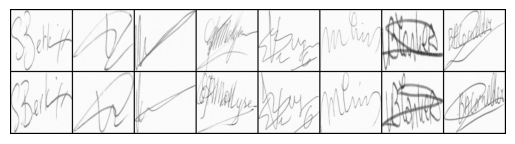

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training loss0.002057708415065659
--------------------
Eval loss0.00160527566643082
--------------------
Best Eval loss0.00160527566643082
Model Saved Successfully


KeyboardInterrupt: ignored

In [ ]:
# load the dataset
training_dir = training_dir
testing_dir = testing_dir
training_csv = training_csv
testing_csv = testing_csv


# preprocessing and loading the dataset
class SiameseDataset:
    # Siamise dataset is used to load the dataset and preprocess the images
    def __init__(self, training_csv=None, training_dir=None, transform=None):
        # used to prepare the labels and images path
        self.train_df = pd.read_csv(training_csv)
        self.train_df.columns = ["image1", "image2", "label"]
        self.train_dir = training_dir
        self.transform = transform

    def __getitem__(self, index):

        # getting the image path
        image1_path = os.path.join(self.train_dir, self.train_df.iat[index, 0])
        image2_path = os.path.join(self.train_dir, self.train_df.iat[index, 1])

        # Loading the image
        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")

        # Apply image transformations
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return (
            img0,
            img1,
            torch.from_numpy(
                np.array([int(self.train_df.iat[index, 2])], dtype=np.float32)
            ),
        )

    def __len__(self):
        return len(self.train_df)


# Load the the dataset from raw image folders
siamese_dataset = SiameseDataset(
    training_csv,
    training_dir,
    transform=transforms.Compose(
        [transforms.Resize((105, 105)), transforms.ToTensor()]
    ),
)


# Viewing the sample of images and to check whether its loading properly
vis_dataloader = DataLoader(siamese_dataset, shuffle=True, batch_size=8) # DataLoader is used to load the data from the dataset and create batches of data
dataiter = iter(vis_dataloader) # iter() is used to iterate through all the images in the dataset


example_batch = next(dataiter) # next() is used to get the next image in the dataset
concatenated = torch.cat((example_batch[0], example_batch[1]), 0) # concatenate the images in the dataset to form a grid of images 
imshow(torchvision.utils.make_grid(concatenated)) # display the images in the form of a grid
print(example_batch[2].numpy()) # print the labels of the images


#create a siamese network
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__() # inherit from nn.Module

        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential( # Sequential is used to create a network of layers
           
            # Convolutional Layer: it is used to extract features from the input image by sliding a filter window over the input image. Every image is then convolved with an image filter.
            # Batch Normalization: it is used to normalize the input layer by adjusting and scaling the activations. It also helps in reducing overfitting.    
            # Local Response Normalization: it is used to normalize the input layer by adjusting and scaling the activations. It also helps in reducing overfitting.
            # ReLU: it is used to add non-linearity to the network.
            # Max Pooling: it is used to reduce the size of the image by reducing the information and taking the maximum value pixel from the area of the image covered by the filter.
            # Dropout: it is used to prevent overfitting by randomly dropping neurons from the neural network during training.
            # Fully Connected Layer: it is used to connect every neuron in one layer to every neuron in another layer.

            nn.Conv2d(in_channel=1, out_channel=96, kernel_size=11,stride=1), 
            nn.BatchNorm2d(num_features=96),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2), 
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(in_channel=96, out_channel=256, kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(inplace=True),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),

            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(p=0.3),
        )

        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2))



    def forward_once(self, x): 
        # Forward pass of the neural network 
        output = self.cnn1(x) # pass the input through the convolutional layers
        output = output.view(output.size()[0], -1) # flatten the output from the convolutional layer
        output = self.fc1(output) # pass the input through the fully connected layers
        return output

    def forward(self, input1, input2): 
        output1 = self.forward_once(input1) # forward pass of input 1
        output2 = self.forward_once(input2) # forward pass of input 2
        return output1, output2

 # Load the dataset as pytorch tensors using dataloader

train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=batch_size) 


net = SiameseNetwork().cuda() # cuda() is used to load the model on the GPU for faster training and testing 
criterion = ContrastiveLoss() # initialize the contrastive loss function
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, weight_decay=0.0005) # initialize the Adam optimizer

# Optimizer: it is used to update the weights of the neural network to minimize the loss function. It uses the gradient of the loss function to update the weights.

#train the model
def train(train_dataloader):
    loss=[] # initialize the loss array
    counter=[]
    iteration_number = 0
    for i, data in enumerate(train_dataloader,0):
      img0, img1 , label = data # get the images and labels from the dataloader
      img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda() # load the images and labels on the GPU
      optimizer.zero_grad() # zero the gradients
      output1,output2 = net(img0,img1) # forward pass the images through the network
      loss_contrastive = criterion(output1,output2,label) # calculate the loss using the contrastive loss function
      loss_contrastive.backward() # backpropagate through the network to calculate the gradients
      # backward() generated automatically by autograd 
      optimizer.step() # update the weights using the optimizer
      loss.append(loss_contrastive.item()) # append the loss to the loss array
    loss = np.array(loss)
    return loss.mean()/len(train_dataloader) # return the mean loss


def eval(eval_dataloader):
    loss=[]
    counter=[]
    iteration_number = 0
    for i, data in enumerate(eval_dataloader,0):
      img0, img1 , label = data
      img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
      output1,output2 = net(img0,img1)
      loss_contrastive = criterion(output1,output2,label)
      loss.append(loss_contrastive.item())
    loss = np.array(loss)
    return loss.mean()/len(eval_dataloader)


for epoch in range(1,epochs):
  best_eval_loss = 9999 # initialize the best eval loss
  train_loss = train(train_dataloader) # train the model on the training dataset
  eval_loss = eval(train_dataloader) # evaluate the model on the training dataset

  print(f"Training loss{train_loss}")
  print("-"*20)
  print(f"Eval loss{eval_loss}")

  if eval_loss<best_eval_loss:
    best_eval_loss = eval_loss
    print("-"*20)
    print(f"Best Eval loss{best_eval_loss}")
    torch.save(net.state_dict(), "/content/model.pth")
    print("Model Saved Successfully")

# Load the test dataset


In [ ]:
#create a siamese network
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(

            nn.Conv2d(1, 96, kernel_size=11,stride=1),
            nn.BatchNorm2d(96),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            #nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),

            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(p=0.3),

        )

        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2))



    def forward_once(self, x):
        # Forward pass
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        # forward pass of input 2
        output2 = self.forward_once(input2)
        return output1, output2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SiameseNetwork()
model.load_state_dict(torch.load('/content/model.pth'))
# model = torch.load('/content/gdrive/MyDrive/data/sign_data/sign_data/model.pt', map_location=device)

<All keys matched successfully>

In [ ]:

def compute_accuracy_roc(predictions, labels): 
    # Compute ROC accuracy with a range of thresholds on distances. 
    # The ROC curve is a graph that plots the true positive rate (TPR) against the false positive rate (FPR) at all possible classification thresholds. The TPR is the proportion of positive cases that are correctly classified as positive, while the FPR is the proportion of negative cases that are incorrectly classified as positive. 
    dmax = np.max(predictions) # maximum distance between the two embeddings
    dmin = np.min(predictions) # minimum distance between the two embeddings
    nsame = np.sum(labels == 1) # number of similar image pairs
    ndiff = np.sum(labels == 0) # number of dissimilar image pairs
    step = 0.001 # step size
    max_acc = 0 # initialize the maximum accuracy

    d_optimal = 0 # initialize the optimal distance
    for d in np.arange(dmin, dmax + step, step):
        idx1 = predictions.ravel() <= d # ravel() is used to flatten the array and idx1 is used to store the indices of the predictions that are less than or equal to d
        idx2 = predictions.ravel() > d # idx2 is used to store the indices of the predictions that are greater than d

        tpr = float(np.sum(labels[idx1] == 1)) / nsame # true positive rate
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff # true negative rate

        acc = 0.5 * (tpr + tnr) # accuracy = 0.5 * (true positive rate + true negative rate)

        if acc > max_acc:
            max_acc = acc # update the maximum accuracy
            d_optimal = d # update the optimal distance

    return max_acc, d_optimal


batch_avg_acc = 0
batch_avg_d = 0
n_batch = 0


In [ ]:
test_dataset = SiameseDataset(
    training_csv=testing_csv,
    training_dir=testing_dir,
    transform=transforms.Compose(
        [transforms.Resize((105, 105)), transforms.ToTensor()]
    ),
)

batch_avg_acc = 0 # initialize the batch average accuracy
batch_avg_d = 0 # initialize the batch average distance
n_batch = 0 # initialize the number of batches

test_dataloader = DataLoader(test_dataset, num_workers=6, batch_size=8, shuffle=True)

total_count = 0 # initialize the total count
correct_count=0 # initialize the correct count
d_acc=0 # initialize the distance accuracy
# threshold=0.6
for i, data in enumerate(test_dataloader, 0):
    x0, x1, label = data
    concat = torch.cat((x0, x1), 0)
    output1, output2 = model(x0, x1)
    labels=label.long()
    eucledian_distance = F.pairwise_distance(output1, output2)
    total_count += 1
    # if label == torch.FloatTensor([[0]]):
    #     label = "Original Pair Of Signature"
    # else:
    #     label = "Forged Pair Of Signature"
    acc, d = compute_accuracy_roc(eucledian_distance.detach().numpy(), labels.detach().numpy())
    # acc, d = compute_accuracy_roc(dist.detach().numpy(), labels.detach().numpy())
    print('Max accuracy for batch {} = {} at d = {}'.format(i, acc, d))
    batch_avg_acc += acc
    batch_avg_d += d
    n_batch += 1

    # imshow(torchvision.utils.make_grid(concat))
    # print("Predicted Eucledian Distance:-", eucledian_distance.item())
    # print("Actual Label:-", label)

#     if eucledian_distance.item() < threshold:
#         predicted_label = "Original Pair Of Signature"
#     else:
#         predicted_label = "Forged Pair Of Signature"

#     if predicted_label == label:
#         correct_count += 1

#     total_count += 1

#     imshow(torchvision.utils.make_grid(concat))
#     print("Predicted Label:-", predicted_label)
#     print("Actual Label:-", label)
#     print("Predicted Eucledian Distance:-", eucledian_distance.item())


# accuracy = correct_count / total_count
# print("Accuracy:-", accuracy)
print(d_acc/10);

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Max accuracy for batch 0 = 0.7 at d = 0.40999777317047126
Max accuracy for batch 1 = 0.5 at d = 0.5736076867580416
Max accuracy for batch 2 = 0.9166666666666667 at d = 0.9521546574831016
Max accuracy for batch 3 = 0.8571428571428572 at d = 0.647489528179169
Max accuracy for batch 4 = 0.9166666666666667 at d = 0.6448098766803744
Max accuracy for batch 5 = 0.5833333333333334 at d = 0.43232840299606323
Max accuracy for batch 6 = 0.7333333333333334 at d = 0.56915846824646
Max accuracy for batch 7 = 0.5333333333333333 at d = 0.5206473137140277
Max accuracy for batch 8 = 0.75 at d = 0.25693121182918555
Max accuracy for batch 9 = 1.0 at d = 0.6742663898468019
Max accuracy for batch 10 = 0.5333333333333333 at d = 0.9156227774620057
Max accuracy for batch 11 = 0.8333333333333333 at d = 0.5457104467451577
Max accuracy for batch 12 = 0.9166666666666667 at d = 0.601152918815613
Max accuracy for batch 13 = 0.5333333333333333 at d = 0.4628633325099948
Max accuracy for batch 14 = 0.625 at d = 0.24224

<ipython-input-11-96a56c98496f>:15: RuntimeWarning: invalid value encountered in divide
  tnr = float(np.sum(labels[idx2] == 0)) / ndiff


Max accuracy for batch 139 = 0 at d = 0
Max accuracy for batch 140 = 0.75 at d = 0.5364857937097552
Max accuracy for batch 141 = 0.9 at d = 0.4684960517883303
Max accuracy for batch 142 = 0.75 at d = 0.38082776916027095
Max accuracy for batch 143 = 1.0 at d = 0.9558308377265937
Max accuracy for batch 144 = 0.5833333333333334 at d = 0.34587720036506653
Max accuracy for batch 145 = 0.8333333333333333 at d = 0.6371776890754702
Max accuracy for batch 146 = 0.5 at d = 0.3001952447891236
Max accuracy for batch 147 = 0.75 at d = 0.4093502181172374
Max accuracy for batch 148 = 0.8333333333333333 at d = 0.43232364976406124
Max accuracy for batch 149 = 0.7333333333333334 at d = 1.0775212333202369
Max accuracy for batch 150 = 0.9285714285714286 at d = 0.20186934500932707
Max accuracy for batch 151 = 0.8333333333333333 at d = 0.705142427682877
Max accuracy for batch 152 = 0.5666666666666667 at d = 0.9113524817824371
Max accuracy for batch 153 = 0.5 at d = 0.42527846240997336
Max accuracy for batch

<ipython-input-11-96a56c98496f>:14: RuntimeWarning: invalid value encountered in divide
  tpr = float(np.sum(labels[idx1] == 1)) / nsame


Max accuracy for batch 269 = 0 at d = 0
Max accuracy for batch 270 = 0.5 at d = 0.41391694784164446
Max accuracy for batch 271 = 0.5 at d = 1.2455436229705819
Max accuracy for batch 272 = 0.6 at d = 0.4054991900920868
Max accuracy for batch 273 = 0.8 at d = 0.9958498842716224
Max accuracy for batch 274 = 0.7333333333333334 at d = 0.8201560051441198
Max accuracy for batch 275 = 0.5833333333333334 at d = 0.26170313358306885
Max accuracy for batch 276 = 0.5 at d = 0.6140403032302858
Max accuracy for batch 277 = 0.5 at d = 1.5082339587211617
Max accuracy for batch 278 = 0.75 at d = 0.7866283900737767
Max accuracy for batch 279 = 0.75 at d = 0.32131242752075195
Max accuracy for batch 280 = 0.5 at d = 0.9643257906436926
Max accuracy for batch 281 = 0.6666666666666666 at d = 0.11357490107417112
Max accuracy for batch 282 = 0.7 at d = 0.6773116753101354
Max accuracy for batch 283 = 1.0 at d = 0.46899520468711864
Max accuracy for batch 284 = 0.6666666666666666 at d = 1.105114307403565
Max accur

In [ ]:
print('Avg acc across all batches={} at d={}'.format(batch_avg_acc / n_batch, batch_avg_d / n_batch))

Avg acc across all batches=0.6711868335651373 at d=0.6940036735244833


In [ ]:


def compute_accuracy_roc(predictions, labels):
    dmax = np.max(predictions) # maximum distance between the two embeddings
    dmin = np.min(predictions) # minimum distance between the two embeddings
    nsame = np.sum(labels == 1) # number of similar image pairs
    ndiff = np.sum(labels == 0) # number of dissimilar image pairs
    step = 0.001 # step size
    max_acc = 0 # initialize the maximum accuracy

    d_optimal = 0 # initialize the optimal distance
    for d in np.arange(dmin, dmax + step, step):
        idx1 = predictions.ravel() <= d # ravel() is used to flatten the array and idx1 is used to store the indices of the predictions that are less than or equal to d 
        idx2 = predictions.ravel() > d # idx2 is used to store the indices of the predictions that are greater than d

        tpr = float(np.sum(labels[idx1] == 1)) / nsame  
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff

        acc = 0.5 * (tpr + tnr)

        if acc > max_acc:
            max_acc = acc
            d_optimal = d

    return max_acc, d_optimal


batch_avg_acc = 0
batch_avg_d = 0
n_batch = 0


def test():
    model.eval()
    global batch_avg_acc, batch_avg_d, n_batch

    test_dataset = TestDataset()
    loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

    for batch_index, data in enumerate(loader):
        A = data[0]
        B = data[1]
        labels = data[2].long()

        f_a, f_b = model.forward(A, B)
        dist = distance_metric(f_a, f_b)

        acc, d = compute_accuracy_roc(dist.detach().numpy(), labels.detach().numpy())
        print('Max accuracy for batch {} = {} at d = {}'.format(batch_index, acc, d))
        batch_avg_acc += acc
        batch_avg_d += d
        n_batch += 1


print('CEDAR1:')
test()
print('Avg acc across all batches={} at d={}'.format(batch_avg_acc / n_batch, batch_avg_d / n_batch))